# Building Models in PyTorch and review of different NN-types


## Using `torch.nn.Module` and `torch.nn.Parameter`

Let's discuss the tools PyTorch makes available for building deep learning networks.

Most subclasses enherit information from `torch.nn.Module`. This is the base class that hides the complexity of the model. Here we'll define the layers that will make up the Neural Network.

Registering the parameters within the modules is one of the complexities which is hidden from the end-user. So the learning weights are expressed as objects of  `torch.nn.Parameter` and incorporated within the modules.

`torch.nn.Parameter` enherits from the `torch.Tensor` and these elements, when they are added to a `Module` will be accessible through the `parameters()` method.

Let's look at an example where we have a model with two linear layers and an activation function. 


In [1]:
import torch

In [2]:
BATCH_SIZE = 16
DIM_IN = 100       # typically higher values will be used (100)
HIDDEN_SIZE = 200  # typically higher values will be used (200)
DIM_OUT = 10

class MyModel(torch.nn.Module):

    def __init__(self):
        super(MyModel, self).__init__()
        
        self.linear1 = torch.nn.Linear(DIM_IN, HIDDEN_SIZE)
        self.activation = torch.nn.ReLU()
        self.linear2 = torch.nn.Linear(HIDDEN_SIZE, DIM_OUT)
        self.softmax = torch.nn.Softmax()
        
    def forward(self, x):
        x = self.linear1(x)
        x = self.activation(x)
        x = self.linear2(x)
        x = self.softmax(x)
        return x
    
myModel = MyModel()

Our new model, `MyModel` is a class that enherits from torch.nn.Module. 

* The `__init__()` method will define the structure of the model. 
* The `forward()` method will define how the layers are interconnecting and where the actual computations will take place.

Let's look at some of the info embedded within this object.

In [3]:
print('The model:')
print(myModel)

The model:
MyModel(
  (linear1): Linear(in_features=100, out_features=200, bias=True)
  (activation): ReLU()
  (linear2): Linear(in_features=200, out_features=10, bias=True)
  (softmax): Softmax(dim=None)
)


This allows to see how the model is built up. We can also look at each layers invidually:

In [4]:
print('Content of layer2:')
print(myModel.linear2)

Content of layer2:
Linear(in_features=200, out_features=10, bias=True)


The parameters of the model, can be accessed through the `.parameters()` method. You could possible change the size of the neural network and define less parameters for each layer :

In [5]:
print('Model parameters:')
for param in myModel.parameters():
    print(param)

Model parameters:
Parameter containing:
tensor([[ 0.0819, -0.0900,  0.0104,  ...,  0.0342,  0.0249, -0.0596],
        [ 0.0116,  0.0136, -0.0122,  ...,  0.0878, -0.0883,  0.0265],
        [-0.0492,  0.0768,  0.0894,  ...,  0.0768,  0.0438, -0.0496],
        ...,
        [-0.0187,  0.0203,  0.0358,  ..., -0.0262, -0.0230, -0.0098],
        [ 0.0721,  0.0710,  0.0652,  ...,  0.0591, -0.0730,  0.0665],
        [-0.0671,  0.0033, -0.0158,  ...,  0.0743,  0.0380,  0.0227]],
       requires_grad=True)
Parameter containing:
tensor([-0.0740,  0.0162, -0.0242,  0.0961,  0.0459, -0.0570, -0.0478,  0.0818,
        -0.0276,  0.0380, -0.0207,  0.0226,  0.0823,  0.0750, -0.0258,  0.0440,
         0.0776,  0.0785,  0.0832,  0.0759, -0.0565, -0.0223, -0.0536, -0.0847,
         0.0771,  0.0073,  0.0232, -0.0007, -0.0354,  0.0095,  0.0410, -0.0728,
         0.0981,  0.0771, -0.0456,  0.0682, -0.0544,  0.0490, -0.0927,  0.0394,
        -0.0129, -0.0731,  0.0296, -0.0522, -0.0525,  0.0484, -0.0337,  0.008

Note that these parameters all have the attribute `require_grad=True` set. As this is set for each parameter within a model that inherits from nn.Module.

We can also look at the parameters of one particular layer:

In [6]:
print('\n\nLayer params:')
for param in myModel.linear2.parameters():
    print(param)



Layer params:
Parameter containing:
tensor([[-0.0620, -0.0055, -0.0454,  ..., -0.0057,  0.0214,  0.0651],
        [ 0.0077,  0.0128, -0.0702,  ..., -0.0156, -0.0426,  0.0059],
        [ 0.0371, -0.0128, -0.0437,  ..., -0.0098, -0.0645,  0.0368],
        ...,
        [ 0.0002, -0.0120, -0.0142,  ..., -0.0443, -0.0229, -0.0319],
        [ 0.0242, -0.0509,  0.0109,  ...,  0.0451, -0.0105, -0.0088],
        [-0.0339, -0.0343,  0.0259,  ...,  0.0123, -0.0077, -0.0619]],
       requires_grad=True)
Parameter containing:
tensor([-0.0135, -0.0681,  0.0452, -0.0422,  0.0205,  0.0005, -0.0115,  0.0158,
         0.0689,  0.0188], requires_grad=True)


## Types of Layers

### Linear Layer


The *linear*, *affine* or *fully connected* layer is a layer where all the input parameters will be influencing all the output parameters of the layer. So every input parameter is connected by means of the layer's weights to the output parameters.

Linear layers are used very often in deep learning models. You'll see them appear in **classifier** models, where the last couple of layers of the neural network are linear layers. The last layer of such a neural network will then have *n* outputs and the number *n* will then define the number of classes that need to be identified.

And if the model has *m* inputs and *n* outputs, the weights will be captured in a **m * n** matrix. 

So our first input layer above, will have a 100 by 200 sized matrix to contain all necessary weights.

Let's also look at a different configuration where we isolate a linear layer and define an input vector $\vec x$ of size 4 that is connected to an output vector $\vec y$ of size 3. 

In [7]:
torch.manual_seed(42) # Make random data generation reproducible 
lin = torch.nn.Linear(4, 3)  
x = torch.rand(1, 4)
print('Input:')
print(x)

print('\n\nWeight and Bias parameters:')
for param in lin.parameters():
    print(param)

y = lin(x)
print('\n\nOutput:')
print(y)

Input:
tensor([[0.4294, 0.8854, 0.5739, 0.2666]])


Weight and Bias parameters:
Parameter containing:
tensor([[ 0.3823,  0.4150, -0.1171,  0.4593],
        [-0.1096,  0.1009, -0.2434,  0.2936],
        [ 0.4408, -0.3668,  0.4346,  0.0936]], requires_grad=True)
Parameter containing:
tensor([0.3694, 0.0677, 0.2411], requires_grad=True)


Output:
tensor([[0.9562, 0.0486, 0.3799]], grad_fn=<AddmmBackward0>)


The linear layer will perform the matrix multiplication of `weights * x + bias = y`.
These elements can also be seen in the abov output:
The Weight parameters:

    Parameter containing:
    tensor([[ 0.3823,  0.4150, -0.1171,  0.4593],
        [-0.1096,  0.1009, -0.2434,  0.2936],
        [ 0.4408, -0.3668,  0.4346,  0.0936]], requires_grad=True)

The Bias parameters:

    Parameter containing:
    tensor([0.3694, 0.0677, 0.2411], requires_grad=True)

There is a difference between a `Parameter` and a `Tensor`. As explained above, the `Parameter` will enherit from `Tensor`, but it will also set the `requires_grad=True`. This is the difference between both.

### Convolutional Layers

The *Convolutional* layer is built to handle this type of spatially correlated data and will **self-create** filters that will be applied to isolate features from the previous layers.

Spatially correlated data indicates that a specific element is somehow correlated with a set of data points in the vecinity of that specific element. The data representing a picture, will typically have this correlation: Most pixels in the vecinity of a specific pixel, will not differentiate much from any of the surrounding pixels. 

Also NLP applications where word-embeddings are used to group similar words together, or computer vision application all show these spatially correlated data.

Let's look at a neural network that is configured to handle black & white pictures. The input channel is assumed to be a 1x32x32 black and white image.

In [8]:
import torch.functional as F


class LeNet(torch.nn.Module):

    def __init__(self):
        super(LeNet, self).__init__()

        # 1 input image channel (black & white), 6 output channels, 5x5 square convolution
        self.conv1 = torch.nn.Conv2d(1, 6, 5)
        # self.conv1 = torch.nn.Conv2d(1, 6, (5,5)) # similar notation, both width and height are identical
            # input : 32x32
            # window : 5x5
            # output : input - window + 1 = 32-5+1 = 28 for 2 dimensions and 6 output channels
        
        # A max_pool2D will then be applied: This will reduce the output to 14x14 (per channel, and there are 6 channels)
        
        # 6 input channels (received from the max_pool2D of 14x14), 16 output channels, 3x3 square convolution
        self.conv2 = torch.nn.Conv2d(6, 16, 3)
        # self.conv2= torch.nn.Conv2d(6, 16, (3,3)) # similar notation, both width and height are identical
            # input : 14x14
            # window : 3x3
            # output 1 channel : input - window + 1 = 14-3+1 = 12 for 2 dimensions
            # output 16 channel : 16x12x12

        # A max_pool2D of (2x2) will take place: This will reduce the output to 6x6 (per channel, and there are 16 channels)

        # Fully connected layers  an affine operation: y = Wx + b
        self.fc1 = torch.nn.Linear(16 * 6 * 6, 120)  # 6*6 from image dimension
        self.fc2 = torch.nn.Linear(120, 84)
        self.fc3 = torch.nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can also only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

Let's break down what's happening in the convolutional layers of this model. Starting with `conv1`:

* The input is a 1x32x32 black & white image. **The first argument to a convolutional layer's constructor is the number of input channels.** Here, it is 1. If we were building this model to look at 3-color channels, it would be 3.
* A convolutional layer is like a window that scans over the image, looking for a pattern it recognizes. These patterns are called *features,* and one of the parameters of a convolutional layer is the number of features we would like it to learn. **This is the second argument to the constructor is the number of output features.** Here, we're asking our layer to learn 6 features.
* **The third argument is the window or *kernel* size.** Here, the "5" means we've chosen a 5x5 kernel. (If you want a kernel with height different from width, you can specify a tuple for this argument - e.g., `(3, 5)` to get a 3x5 convolution kernel.)

The output of a convolutional layer is an *activation map* - a spatial representation of the presence of features in the input tensor. `conv1` will give us an output tensor of 6x28x28; 6 is the number of features, and 28 is the height and width of our map. (The 28 comes from the fact that when scanning a 5-pixel window over a 32-pixel row, there are only 28 valid positions.)

We then pass the output of the convolution through a ReLU activation function (more on activation functions later), then through a max pooling layer. The max pooling layer takes features near each other in the activation map and groups them together. It does this by reducing the tensor, merging every 2x2 group of cells in the output into a single cell, and assigning that cell the maximum value of the 4 cells that went into it. This gives us a lower-resolution version of the activation map, with dimensions 6x14x14.

Our next convolutional layer, `conv2`, expects 6 input channels (corresponding to the 6 features sought by the first layer), has 16 output channels, and a 3x3 kernel. It puts out a 16x12x12 activation map, which is again reduced by a max pooling layer to 16x6x6. Prior to passing this output to the linear layers, it is reshaped to a 16 * 6 * 6 = 576-element vector for consumption by the next layer.

There are convolutional layers for addressing 1D, 2D, and 3D tensors. There are also many more optional arguments for a conv layer constructor, including stride length(e.g., only scanning every second or every third position) in the input, padding (so you can scan out to the edges of the input), and more. See the [documentation](https://pytorch.org/docs/stable/nn.html#convolution-layers) for more information.

### Exercise
Create a convolutional network with the same number and type of layers as in above example, whereby the number of features of the 1st and 2nd convolution, are respectively 9 and 25, with a convolutional filter of 3x3 and then 4x4. Perform max_pooling on a 2x2 basis for the first and second layer.
The first fully connected layers should reduce the output of the convolutional layers, to 540 and the next layer to 54 and the next to 10.
Also use a different activation function in your fully connected layers.

Create each layer independently.

### Recurrent Layers

Data where the order of the data is important, such as time-series measurement, somehow need to keep track of recently occured information. 

For this type of data, a special kind of layer has been developed: The *Recurrent neural networks* (or *RNNs*). They are used for sequential data (so time-series related data), but also in NLP where the order of words is important or  in DNA nucleotides. 

RNN have been developed to keep track of 'earlier' data by means of a *hidden state* that acts as a sort of memory for what it has seen in the data at that point.

The internal structure of an RNN layer, and more specifically the **LSTM** (long short-term memory) and **GRU** (gated recurrent unit) will be discussed below:

In [9]:
class LSTMTagger(torch.nn.Module):

    def __init__(self, embedding_dim, hidden_dim, vocab_size, tagset_size):
        super(LSTMTagger, self).__init__()
        self.hidden_dim = hidden_dim

        self.word_embeddings = torch.nn.Embedding(vocab_size, embedding_dim)

        # The LSTM takes word embeddings as inputs, and outputs hidden states
        # with dimensionality hidden_dim.
        self.lstm = torch.nn.LSTM(embedding_dim, hidden_dim)

        # The linear layer that maps from hidden state space to tag space
        self.hidden2tag = torch.nn.Linear(hidden_dim, tagset_size)

    def forward(self, sentence):
        embeds = self.word_embeddings(sentence)
        lstm_out, _ = self.lstm(embeds.view(len(sentence), 1, -1))
        tag_space = self.hidden2tag(lstm_out.view(len(sentence), -1))
        tag_scores = F.log_softmax(tag_space, dim=1)
        return tag_scores

The constructor (__init__) has four arguments:

* `vocab_size` is the number of words in the input vocabulary. Each word is a one-hot vector (or unit vector) in a `vocab_size`-dimensional space.
* `tagset_size` is the number of tags in the output set.
* `embedding_dim` is the size of the *embedding* space for the vocabulary. An embedding maps a vocabulary onto a low-dimensional space, where words with similar meanings are close together in the space.
* `hidden_dim` is the size of the LSTM's memory.

The input will be a sentence with the words represented as indices of one-hot encoded vectors. The embedding layer will then map these down to an `embedding_dim`-dimensional space. The LSTM takes this sequence of embeddings and iterates over it, fielding an output vector of length `hidden_dim`. The final linear layer acts as a classifier; applying `log_softmax()` to the output of the final layer converts the output into a normalized set of estimated probabilities that a given word maps to a given tag.

If you'd like to see this network in action, check out the [Sequence Models and LSTM Networks](https://pytorch.org/tutorials/beginner/nlp/sequence_models_tutorial.html) tutorial on pytorch.org.

### Transformers

As far as I know and by November 2022, the *Transformers* are the latest multi-purpose networks that are the **state of the art in NLP** with models like BERT.

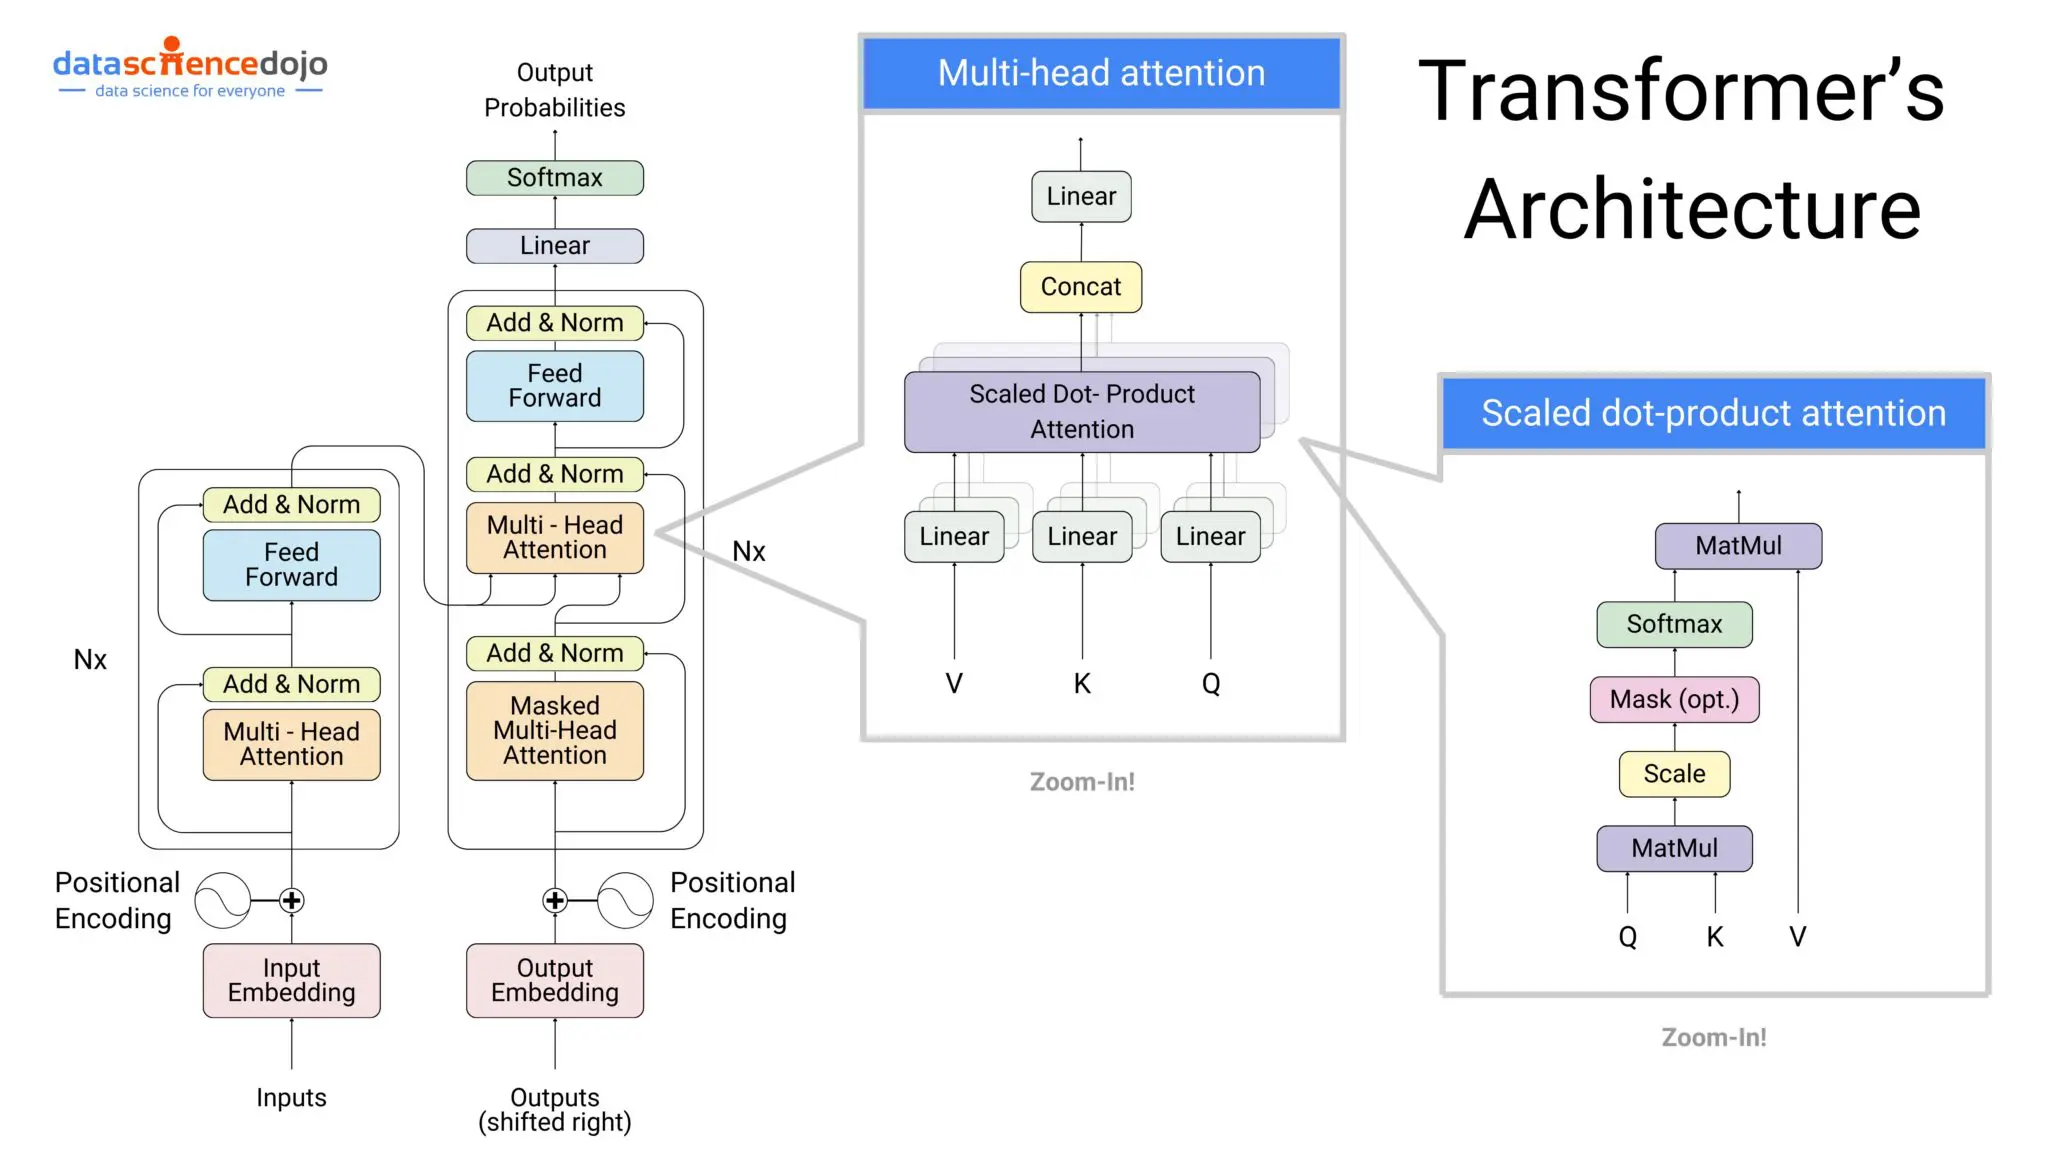 

https://stats.stackexchange.com/questions/512242/why-does-transformer-has-such-a-complex-architecture

https://towardsdatascience.com/attention-is-all-you-need-discovering-the-transformer-paper-73e5ff5e0634

A discussion of transformer architecture is beyond the scope of this course, but PyTorch has a `Transformer` class that allows you to define the overall parameters of a transformer model. 

You will be able to define 

    * the number of attention heads, 
    * the number of encoder & decoder layers, 
    * dropout and activation functions, etc.
    
(You can even build the BERT model from this single class, with the right parameters!) The `torch.nn.Transformer` class also has classes to encapsulate the individual components (`TransformerEncoder`, `TransformerDecoder`) and subcomponents (`TransformerEncoderLayer`, `TransformerDecoderLayer`). 

For details, check out the [documentation](https://pytorch.org/docs/stable/nn.html#transformer) on transformer classes, and the relevant [tutorial](https://pytorch.org/tutorials/beginner/transformer_tutorial.html) on pytorch.org.

## Other Layers and Functions

### Data Manipulation Layers

There are other layer types that perform important functions in models, but don't participate in the learning process themselves.

#### Max_pooling
**Max pooling** (and its twin, min pooling) reduce a tensor by combining cells, and assigning the maximum value of the input cells to the output cell. (We saw this ) For example:

In [10]:
my_tensor = torch.rand(1, 6, 6)
print(my_tensor)

maxpool_layer = torch.nn.MaxPool2d(3)
print(maxpool_layer(my_tensor))

tensor([[[0.6274, 0.2696, 0.4414, 0.2969, 0.8317, 0.1053],
         [0.2695, 0.3588, 0.1994, 0.5472, 0.0062, 0.9516],
         [0.0753, 0.8860, 0.5832, 0.3376, 0.8090, 0.5779],
         [0.9040, 0.5547, 0.3423, 0.6343, 0.3644, 0.7104],
         [0.9464, 0.7890, 0.2814, 0.7886, 0.5895, 0.7539],
         [0.1952, 0.0050, 0.3068, 0.1165, 0.9103, 0.6440]]])
tensor([[[0.8860, 0.9516],
         [0.9464, 0.9103]]])


If you look closely at the values above, you'll see that each of the values in the maxpooled output is the maximum value of each quadrant of the 6x6 input.

#### Normalization

**Normalization layers** re-center and normalize the output of one layer before feeding it to another. Centering the and scaling the intermediate tensors has a number of beneficial effects, such as letting you use higher learning rates without exploding/vanishing gradients.

In [11]:
my_tensor = torch.rand(1, 4, 4) * 20 + 5
print(my_tensor)

print(my_tensor.mean())

norm_layer = torch.nn.BatchNorm1d(4)
normed_tensor = norm_layer(my_tensor)
print(normed_tensor)

print(normed_tensor.mean())


tensor([[[19.1421, 18.1626, 14.8260, 22.8261],
         [ 7.8949, 15.6296,  8.1746, 18.0835],
         [11.5562, 18.0642, 12.9166, 23.2939],
         [ 9.0730,  9.0360,  9.0357, 23.9944]]])
tensor(15.1068)
tensor([[[ 0.1413, -0.2023, -1.3726,  1.4335],
         [-1.0121,  0.7081, -0.9499,  1.2538],
         [-1.0578,  0.3467, -0.7642,  1.4754],
         [-0.5735, -0.5792, -0.5793,  1.7320]]],
       grad_fn=<NativeBatchNormBackward0>)
tensor(5.9605e-08, grad_fn=<MeanBackward0>)


Running the cell above, we've added a large scaling factor and offset to an input tensor; you should see the input tensor's `mean()` somewhere in the neighborhood of 15. After running it through the normalization layer, you can see that the values are smaller, and grouped around zero - in fact, the mean should be very small (> 1e-8).

This is beneficial because many activation functions (discussed below) have their strongest gradients near 0, but sometimes suffer from vanishing or exploding gradients for inputs that drive them far away from zero. Keeping the data centered around the area of steepest gradient will tend to mean faster, better learning and higher feasible learning rates.

#### Dropout layers
**Dropout layers** are a tool for encouraging *sparse representations* in your model - that is, pushing it to do inference with less data.

Dropout layers work by randomly setting parts of the input tensor *during training* - dropout layers are always turned off for inference. This forces the model to learn against this masked or reduced dataset. For example:

In [12]:
my_tensor = torch.rand(1, 4, 4)

dropout = torch.nn.Dropout(p=0.4)
print(dropout(my_tensor))
print(dropout(my_tensor))

tensor([[[0.0000, 0.0000, 0.1456, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000],
         [1.5258, 0.4030, 0.2652, 0.0000],
         [0.0000, 0.0000, 0.0000, 1.3100]]])
tensor([[[1.1110, 1.6352, 0.0000, 0.0068],
         [0.1814, 0.0000, 0.0000, 1.1317],
         [1.5258, 0.4030, 0.2652, 1.2755],
         [0.4965, 1.3391, 0.0000, 1.3100]]])


Above, you can see the effect of dropout on a sample tensor. You can use the optional `p` argument to set the probability of an individual weight dropping out; if you don't it defaults to 0.5.

### Activation Functions

Activation functions make deep learning possible. A neural network is really a program - with many parameters - that *simulates a mathematical function*. If all we did was multiply tensors by layer weights repeatedly, we could only simulate *linear functions;* further, there would be no point to having many layers, as the whole network could be reduced to a single matrix multiplication. Inserting *non-linear* activation functions between layers is what allows a deep learning model to simulate any function, rather than just linear ones.

`torch.nn.Module` has objects encapsulating all of the major activation functions including ReLU and its many variants, Tanh, Hardtanh, sigmoid, and more. It also includes other functions, such as Softmax, that are most useful at the output stage of a model.

### Loss Functions

Loss functions tell us how far a model's prediction is from the correct answer. PyTorch contains a variety of loss functions, including common MSE (mean squared error = L2 norm), Cross Entropy Loss and Negative Likelihood Loss (useful for classifiers), and others.